# Estructuras de datos en ![](https://www.r-project.org/Rlogo.png)



## Factores (factor)

Los factores (factors) son un tipo de estructura de datos para almacenar variables
categóricas.

Recordatorio:
+ **Variable categórica**: aquella que puede tomar un número limitado de posibles valores  (categorías). Ejemplos de variables categóricas: género de una persona, nacionalidad…
    + Variable categórica nominal: aquella que no tiene un orden preestablecido.
    + Variable categórica ordinal: aquella que tiene un orden establecido.
+ **Variable continua**: aquella que puede tomar un número infinito de posibles valores. Ejemplos de variables continuas: peso de una persona, estatura de una persona…

A los distintos valores que puede tomar la variable se les denomina niveles, **factor levels**.

¿Por qué usar factores?
+ Permiten establecer un orden distinto al alfabético.
+ Muchos modelos/paquetes de R los emplean

### Creación de factores

In [1]:
###################################
# Factores: Creación               #
###################################

# Creación de factor sin orden
gender_vector <- c('M', 'F', 'F', 'M', 'M', 'F')
gender_factor <- factor(gender_vector)
gender_factor

[1] M F F M M F
Levels: F M

In [18]:
# Creación de factor con orden (pero sin especificar un orden)
size_vector <- c('S', 'L', 'M', 'L', 'S', 'M')
size_factor <- factor(size_vector, ordered = TRUE) # L < M < S
size_factor

[1] S L M L S M
Levels: L < M < S

In [3]:
# Creación de factor con orden (especificando el orden)
size_vector_2 <- c('S', 'L', 'M', 'L', 'S', 'M')
size_factor_2 <- factor(size_vector_2, ordered = TRUE, levels = c("S", "M", "L")) # S < M < L
size_factor_2

[1] S L M L S M
Levels: S < M < L

In [4]:
# Creación de factor especificando etiquetas
gender_levels_2 <- c('M', 'F', '-') # Como se leen los datos a la entrada
gender_labels_2 <- c('Male', 'Female', NA) # Como se etiquetan
gender_vector_2 <- c('M', 'F', 'F', 'M', 'M', '-')
gender_factor_2 <- factor(gender_vector_2, levels = gender_levels_2, labels = gender_labels_2)
gender_factor_2

[1] Male   Female Female Male   Male   <NA>  
Levels: Male Female <NA>

### Operaciones sobre factores

No es posible realizar operaciones aritméticas con factores.

Pero sí es posible realizar operaciones booleanas (comparaciones)

In [17]:
###################################
# Factores: Operaciones            #
###################################

# Comprobaciones en factors sin orden (solo =)
gender_factor[1] == gender_factor[2]
gender_factor[1] == size_factor[2] # ERROR: solo se pueden comparar si son del mismo tipo

[1] FALSE

Warning message in eval(expr, envir, enclos):
"Métodos incompatibles ("Ops.factor", "Ops.ordered") para "==""

ERROR: Error in gender_factor[1] == size_factor[2]: comparaciones de estos tipoo no están implementadas


In [6]:
# Comprobaciones en factors con orden (se puede >, <...)
size_factor[1] > size_factor[2]
gender_factor[1] < gender_factor[2] # ERROR: solo se pueden comparar si tienen orden

[1] TRUE

Warning message in Ops.factor(gender_factor[1], gender_factor[2]):
"'<' not meaningful for factors"

[1] NA

In [7]:
# Obtener los niveles
levels(size_factor)
levels(size_factor)[1]

[1] "L" "M" "S"

[1] "L"

In [8]:
# Comprobar la existencia de niveles
any(levels(size_factor) %in% c('L', 'S'))

[1] TRUE

In [19]:
# Añadir nuevos niveles
levels(size_factor)[length(levels(size_factor)) + 1] <- 'XL'
levels(size_factor) <- c(levels(size_factor), 'XS')
levels(size_factor)
size_factor

[1] "L"  "M"  "S"  "XL" "XS"

[1] S L M L S M
Levels: L < M < S < XL < XS

In [20]:
# Reordenar niveles
levels(size_factor)
size_factor <- factor(size_factor, ordered = TRUE, levels(size_factor)[c(5, 3:1, 4)])
size_factor

[1] "L"  "M"  "S"  "XL" "XS"

[1] S L M L S M
Levels: XS < S < M < L < XL

In [22]:
# Cambiar/re-nombrar niveles
levels(size_factor)[5] <- 'ExtraL'
size_factor

[1] S L M L S M
Levels: XS < S < M < L < ExtraL

In [24]:
# Eliminar niveles no utilizados
size_factor <- size_factor[drop = TRUE]
droplevels(size_factor)

[1] S L M L S M
Levels: S < M < L

In [25]:
# Unir factores
a <- factor(1:10)
b <- factor(letters[a])
union <- factor(c(as.character(a), as.character(b)))
cross <- interaction(a, b)
# ambos producen un conjunto no-ordenado de factors.
# levels: union: 20; cross: 100
# Items: union: 20; cross: 10

### Información sobre factores

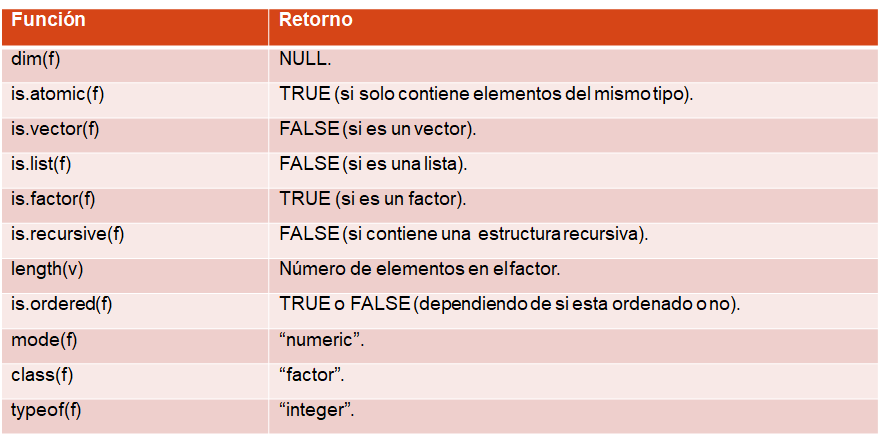

### Traps sobre factores

Al leer ficheros con datasets las cadenas de caracteres se convierten automáticamente a
factores. Al utilizar `read.table` y `read.csv` usar el parámetro `stringsAsFactors = FALSE`.

Si los números de un fichero se factorizan se puede revertir con:  `as.numeric(levels(f))[as.integer(f)]`

Evitar NA’s en factores, suelen causar problemas.

La coerción de un objeto a factor suele ser una fuente de problemas.

In [38]:
f <- factor(c(1,20,3,2,1,3,1,2,2,2,1))

In [45]:
as.numeric(levels(f))[as.integer(f)]

[1]  1 20  3  2  1  3  1  2  2  2  1

In [46]:
as.numeric(f)

[1] 1 4 3 2 1 3 1 2 2 2 1

## Ejercicio 4

In [48]:
###################################
# Factores                        #
###################################

# Crea dos factores con los siguientes vectores
#   1. El de animales no tiene orden
#   2. El de temperatura tiene orden
animals_vector <- c("Elephant", "Giraffe", "Donkey", "Horse")
temperature_vector <- c("High", "Low", "High","Low", "Medium")

In [49]:
factor_animals_vector <- factor(animals_vector)
factor_animals_vector
factor_temperature_vector <- factor(temperature_vector, ordered = TRUE, levels = c("Low", "Medium", "High"))
factor_temperature_vector

[1] Elephant Giraffe  Donkey   Horse   
Levels: Donkey Elephant Giraffe Horse

[1] High   Low    High   Low    Medium
Levels: Low < Medium < High

In [50]:
# Modifica los niveles del siguiente factor para que sean: "Female" y "Male"
# Presta atención al orden en que lo estableces
survey_vector <- c("M", "F", "F", "M", "M")
factor_survey_vector <- factor(survey_vector)

In [51]:
levels(factor_survey_vector) <- c("Female", "Male")

factor_survey_vector

[1] Male   Female Female Male   Male  
Levels: Female Male

In [53]:
# Haz summary sobre el vector y sobre el factor
summary(survey_vector)

   Length     Class      Mode 
        5 character character 

In [54]:
summary(factor_survey_vector)

Female   Male 
     2      3

In [55]:
# Batalla de sexos: ¿Male '>' qué female?
factor_survey_vector[1] > factor_survey_vector[2] 

Warning message in Ops.factor(factor_survey_vector[1], factor_survey_vector[2]):
"'>' not meaningful for factors"

[1] NA

In [58]:
# Crea un factor ordenado para el siguiente vector
speed_vector <- c("Fast", "Slow", "Slow", "Fast", "Ultra-fast")

factor_speed_vector <-  factor(speed_vector, ordered = TRUE, levels = c("Slow", "Fast", "Ultra-fast"))

factor_speed_vector

[1] Fast       Slow       Slow       Fast       Ultra-fast
Levels: Slow < Fast < Ultra-fast

In [59]:
summary(factor_speed_vector) 

# Comprueba si la segunda muestra de tus datos es mayor que la quinta
factor_speed_vector[2] > factor_speed_vector[5]

Slow       Fast Ultra-fast 
         2          2          1

[1] FALSE